# Figure 3 : Average confusion matrixes for the 32x32 resolution across all experiments in Table 4

[:simple-jupyter: :material-download:](../../paper_tables_and_figures/figure3_confusion_matrix_supervised_setting/figure3_confusion_matrix_supervised_setting.ipynb)

In [1]:
import pathlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
folder_artifacts = pathlib.Path(
    "./campaigns/ucdavis-icdm19/augmentation-at-loading-with-dropout/artifacts/"
)

In [30]:
filelists = [
    list(folder_artifacts.glob("*/test-human_conf_mtx.csv")),
    list(folder_artifacts.glob("*/test-script_conf_mtx.csv")),
]

titles = ["human", "script"]

CLASSES = {
    "google-doc": "G. Doc",
    "google-drive": "G. Drive",
    "google-music": "G. Music",
    "google-search": "G. Search",
    "youtube": "YouTube",
}

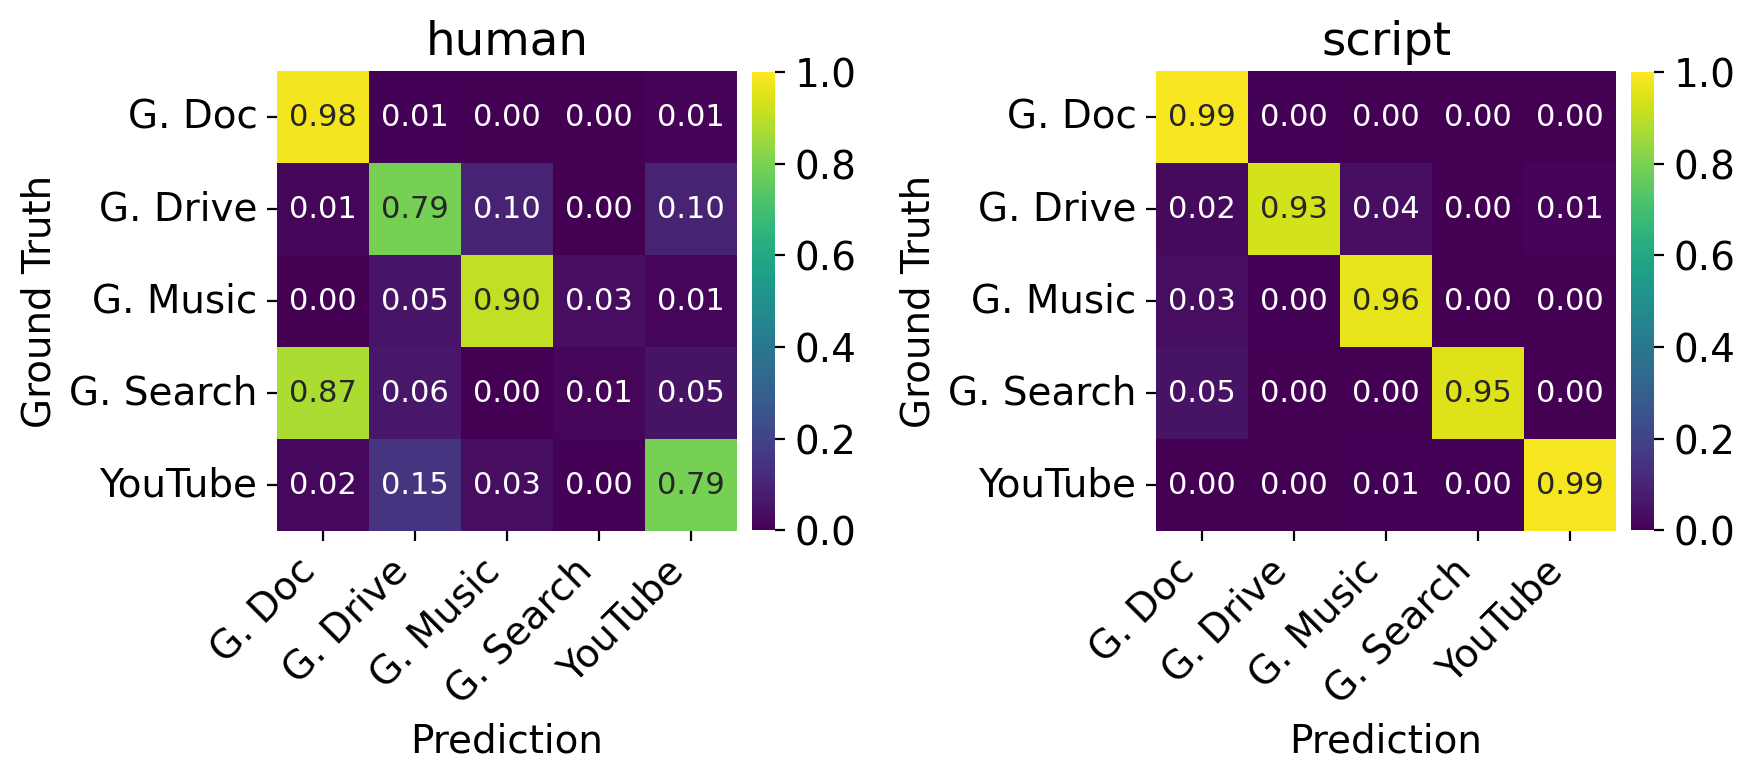

In [36]:
plt.rcParams.update({"font.size": 14})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))
# cbar_ax = fig.add_axes([0.93, 0.2, 0.02, 0.6])  # (left, bottom, width, height)
for i in range(2):
    cm_mean = np.mean(
        np.stack(
            [pd.read_csv(file)[list(CLASSES.keys())].values for file in filelists[i]]
        ),
        axis=0,
    )

    normed_cm_mean = normalize(cm_mean, axis=1, norm="l1")

    ax = axes[i]

    sns.heatmap(
        data=normed_cm_mean,
        ax=ax,
        square=True,
        cmap="viridis",
        annot=True,
        annot_kws={"fontsize": 11},
        fmt=".2f",
        vmin=0,
        vmax=1,
        cbar_kws=dict(fraction=0.046, pad=0.03, aspect=20),
    )

    ax.set_xticklabels(list(CLASSES.values()), rotation=45, ha="right")
    ax.set_yticklabels(list(CLASSES.values()), rotation=0)

    ax.set_title(titles[i])

    ax.set_ylabel("Ground Truth")
    ax.set_xlabel("Prediction")

plt.tight_layout()
plt.savefig("ucdavis_dataset_confusion_matrix.png", bbox_inches="tight", dpi=150)